In [2]:
# Importing necessary modules
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# Data collection and preprocessing

In [3]:
#loading the data
dataset=pd.read_csv('/content/heart.xls')

In [4]:
dataset.head(30)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [29]:
dataset.shape

(918, 12)

In [30]:
#checking null value
dataset.isnull().sum()


,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [31]:
#checking HeartDisease distribution
dataset['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


<Axes: xlabel='HeartDisease', ylabel='count'>

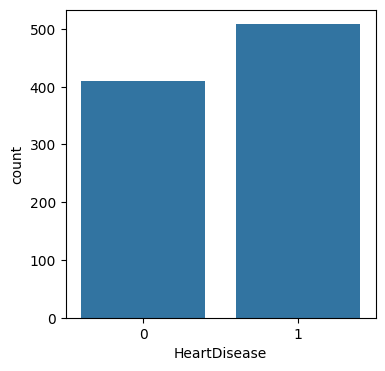

In [32]:
plt.figure(figsize=(4, 4))
sns.countplot(x='HeartDisease', data = dataset)

In [33]:
#Checking for Duplicate data
Duplicate_data=dataset[dataset.duplicated()]
print(Duplicate_data)
dataset.duplicated().sum()

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


0

In [34]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [35]:
# Heart disease-->1
#No Heart disease-->0

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [37]:
for c in dataset.columns:
    if (dataset[c].dtype == 'object'):
        print(c,dataset[c].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


In [38]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

# Assuming 'dataset' is your DataFrame and 'CategoricalColumn' is the column to encode
label_encoder = LabelEncoder()
dataset['Chestpaintype_num'] = label_encoder.fit_transform(dataset['ChestPainType'])
dataset['Sex_num'] = label_encoder.fit_transform(dataset['Sex'])
dataset['RestingECG_num'] = label_encoder.fit_transform(dataset['RestingECG'])
dataset['ExerciseAngina_num'] = label_encoder.fit_transform(dataset['ExerciseAngina'])
dataset['ST_Slope_num'] = label_encoder.fit_transform(dataset['ST_Slope'])

dataset.head(918)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Chestpaintype_num,Sex_num,RestingECG_num,ExerciseAngina_num,ST_Slope_num
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,1,0,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,2,0,1,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,1,2,0,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,1,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,2,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,3,1,1,0,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0,1,1,0,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0,1,1,1,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,1,0,0,0,1


In [39]:
#Seperating Features and target variable
X=dataset.drop(columns=["Sex","ChestPainType","RestingECG","ExerciseAngina","HeartDisease","ST_Slope"])
Y=dataset['HeartDisease']

In [40]:
print(X)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  \
0     40        140          289          0    172      0.0   
1     49        160          180          0    156      1.0   
2     37        130          283          0     98      0.0   
3     48        138          214          0    108      1.5   
4     54        150          195          0    122      0.0   
..   ...        ...          ...        ...    ...      ...   
913   45        110          264          0    132      1.2   
914   68        144          193          1    141      3.4   
915   57        130          131          0    115      1.2   
916   57        130          236          0    174      0.0   
917   38        138          175          0    173      0.0   

     Chestpaintype_num  Sex_num  RestingECG_num  ExerciseAngina_num  \
0                    1        1               1                   0   
1                    2        0               1                   0   
2                    1        

In [41]:
print(Y)

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64


# Performing Feature Selection
# Checking Correlation

In [42]:
desired_columns_order = dataset.columns.tolist()  # Get all columns in the original order
# Remove multiple columns one by one
columns_to_remove = ["Sex","ChestPainType","RestingECG","ExerciseAngina","HeartDisease","ST_Slope"]
for column in columns_to_remove:
    desired_columns_order.remove(column)

# Append 'HeartDisease' at the end of the list
desired_columns_order.append('HeartDisease')

# Rearrange columns using the `loc` method
dataset_c = dataset.loc[:, desired_columns_order]

# Calculate correlation
correlation=dataset_c.corr()
correlation

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Chestpaintype_num,Sex_num,RestingECG_num,ExerciseAngina_num,ST_Slope_num,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,-0.077150,0.055750,-0.007484,0.215793,-0.268264,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,-0.020647,0.005133,0.022656,0.155101,-0.075162,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,0.067880,-0.200092,-0.196544,-0.034166,0.111471,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,-0.073151,0.120076,0.087050,0.060451,-0.175774,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,0.289123,-0.189186,-0.179276,-0.370425,0.343419,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,-0.177377,0.105734,-0.020438,0.408752,-0.501921,0.403951
Chestpaintype_num,-0.077150,-0.020647,0.067880,-0.073151,0.289123,-0.177377,1.000000,-0.126559,-0.072537,-0.354727,0.213521,-0.386828
Sex_num,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,-0.126559,1.000000,0.071552,0.190664,-0.150693,0.305445
RestingECG_num,-0.007484,0.022656,-0.196544,0.087050,-0.179276,-0.020438,-0.072537,0.071552,1.000000,0.077500,-0.006778,0.057384
ExerciseAngina_num,0.215793,0.155101,-0.034166,0.060451,-0.370425,0.408752,-0.354727,0.190664,0.077500,1.000000,-0.428706,0.494282


In [43]:
print(correlation['HeartDisease'].sort_values(ascending=False))

HeartDisease          1.000000
ExerciseAngina_num    0.494282
Oldpeak               0.403951
Sex_num               0.305445
Age                   0.282039
FastingBS             0.267291
RestingBP             0.107589
RestingECG_num        0.057384
Cholesterol          -0.232741
Chestpaintype_num    -0.386828
MaxHR                -0.400421
ST_Slope_num         -0.558771
Name: HeartDisease, dtype: float64


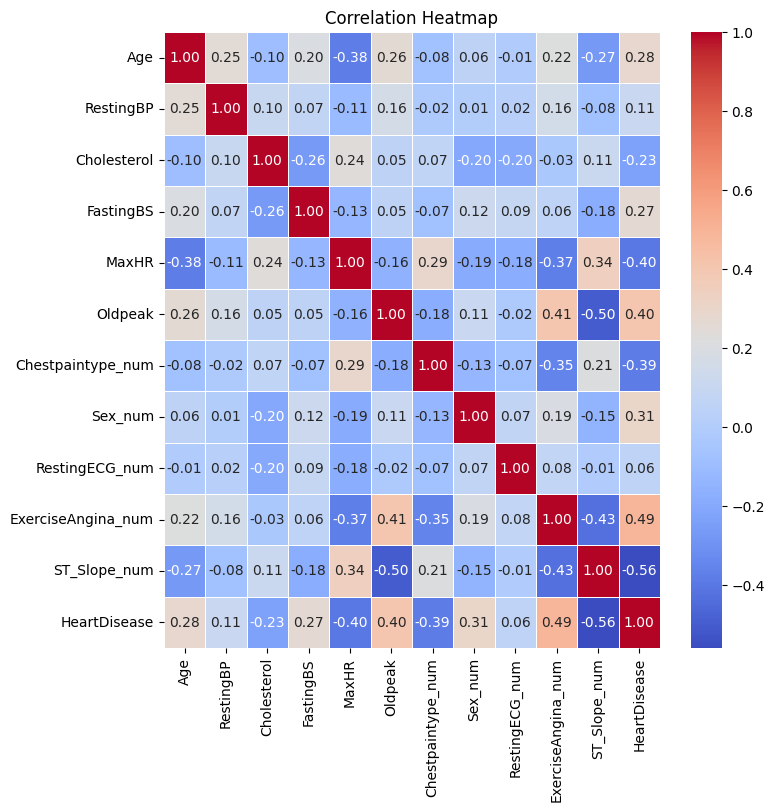

In [44]:

# Plotting heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


<Axes: >

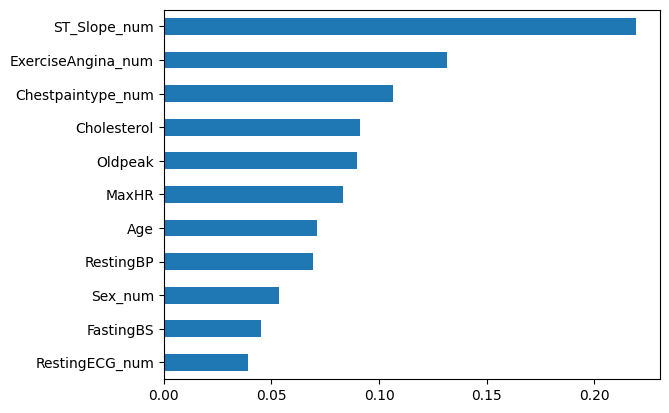

In [45]:
#Imporatant Features
from sklearn.ensemble import ExtraTreesClassifier
corr=ExtraTreesClassifier()
corr.fit(X,Y)
feature_importance=pd.Series(corr.feature_importances_,index=X.columns)
feature_importance.sort_values(ascending=True).plot(kind='barh')

In [46]:
# @title Feature Scaling
scaler=StandardScaler()

In [47]:
X_standard=scaler.fit_transform(X)

In [48]:
#print(X_standard)
print(X_standard[:5, :])

[[-1.4331398   0.41090889  0.82507026 -0.55134134  1.38292822 -0.83243239
   0.22903206  0.51595242  0.01725451 -0.8235563   1.05211381]
 [-0.47848359  1.49175234 -0.17196105 -0.55134134  0.75415714  0.10566353
   1.27505906 -1.93816322  0.01725451 -0.8235563  -0.59607813]
 [-1.75135854 -0.12951283  0.7701878  -0.55134134 -1.52513802 -0.83243239
   0.22903206  0.51595242  1.60121899 -0.8235563   1.05211381]
 [-0.5845565   0.30282455  0.13903954 -0.55134134 -1.13215609  0.57471149
  -0.81699495 -1.93816322  0.01725451  1.21424608 -0.59607813]
 [ 0.05188098  0.95133062 -0.0347549  -0.55134134 -0.5819814  -0.83243239
   1.27505906  0.51595242  0.01725451 -0.8235563   1.05211381]]


In [49]:
# @title Test and Train splitting
X_train,X_test,Y_train,Y_test=train_test_split(X_standard,Y,test_size=0.2,random_state=2)

In [50]:
print(X_standard.shape,X_train.shape,X_test.shape)

(918, 11) (734, 11) (184, 11)


In [51]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):

    """
    Fit the chosen model and print out the score.

    """

    # instantiate model
    model = classifier(**kwargs)

    # train model
    model.fit(X_train,y_train)

    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")

    return model


# K-Fold cross validation function

In [52]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']

      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)

      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

# Logictic Regression

In [53]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0
 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 1 1 1
 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1
 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0]


In [54]:

'''from sklearn.metrics import accuracy_score
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")'''

'from sklearn.metrics import accuracy_score\nscore_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)\n\nprint("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")'

In [55]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR_model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(LR_model, file)

print("Model saved to 'logistic_regression_model.pkl'")


Train accuracy: 86.10%
Test accuracy: 84.24%
Model saved to 'logistic_regression_model.pkl'


<Axes: >

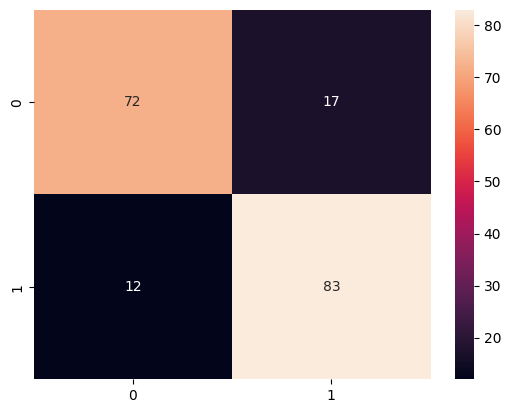

In [56]:

from sklearn.metrics import confusion_matrix


matrix= confusion_matrix(Y_test, y_pred_lr)


sns.heatmap(matrix,annot = True, fmt = "d")


In [57]:
# @title Precision
#if we study, keep this here, otherwise remove this and cell below it
from sklearn.metrics import precision_score


precision = precision_score(Y_test, y_pred_lr)


print("Precision: ",precision)

Precision:  0.83


In [58]:
# @title Recall
from sklearn.metrics import recall_score


recall = recall_score(Y_test, y_pred_lr)


print("Recall is: ",recall)

Recall is:  0.8736842105263158


In [59]:
# @title F-Score
print((2*precision*recall)/(precision+recall))

0.8512820512820513


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming X_standard is your entire feature dataset and y is your target variable

# Create a classifier (e.g., Logistic Regression)
classifier = LogisticRegression()

# Perform k-fold cross-validation
# You can change the number of folds by adjusting the cv parameter
scores = cross_val_score(classifier, X_standard, Y, cv=10)

# Print the cross-validated scores
print("Cross-validated scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean accuracy:", scores.mean()*100)
print("Standard deviation:", scores.std())

Cross-validated scores: [0.79347826 0.88043478 0.86956522 0.88043478 0.86956522 0.82608696
 0.85869565 0.7826087  0.75824176 0.79120879]
Mean accuracy: 83.1032011466794
Standard deviation: 0.04390902598658434


In [61]:
'''#cross validation
lr_model = LogisticRegression()
lr_result = cross_validation(lr_model, X_standard, Y, 5)
print(lr_result)'''

'#cross validation\nlr_model = LogisticRegression()\nlr_result = cross_validation(lr_model, X_standard, Y, 5)\nprint(lr_result)'

# Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB
nb_model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb_model.fit(X_train, Y_train)

y_pred_nb = nb_model.predict(X_test)

with open('Naive_model.pkl', 'wb') as file:
    pickle.dump(nb_model, file)

print("Model saved to 'logistic_regression_model.pkl'")

Train accuracy: 86.24%
Test accuracy: 85.33%
Model saved to 'logistic_regression_model.pkl'


In [67]:

'''score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")'''

'score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)\n\nprint("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")'

<Axes: >

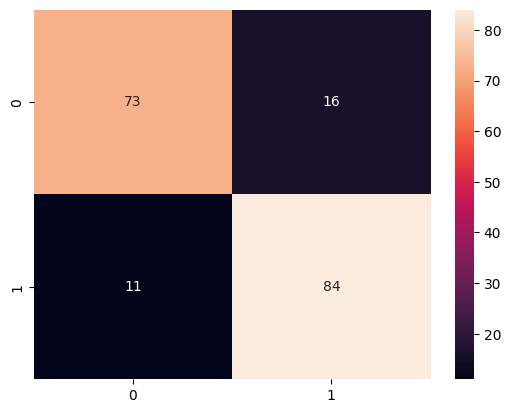

In [68]:
from sklearn.metrics import confusion_matrix


matrix= confusion_matrix(Y_test, y_pred_nb)


sns.heatmap(matrix,annot = True, fmt = "d")

In [69]:
# Precision
from sklearn.metrics import precision_score


precision = precision_score(Y_test, y_pred_nb)


print("Precision: ",precision)

Precision:  0.84


In [70]:
# Recall


from sklearn.metrics import recall_score


recall = recall_score(Y_test, y_pred_nb)


print("Recall is: ",recall)



Recall is:  0.8842105263157894


In [71]:
# F-Score
print((2*precision*recall)/(precision+recall))

0.8615384615384616


In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

# Naive Bayes classifier
classifier = GaussianNB()

# Perform k-fold cross-validation
scores = cross_val_score(classifier, X_standard, Y, cv=5)

# Print the cross-validated scores
print("Cross-validated scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean accuracy:", scores.mean()*100)
print("Standard deviation:", scores.std())

Cross-validated scores: [0.83152174 0.9076087  0.79891304 0.8579235  0.75956284]
Mean accuracy: 83.11059634117368
Standard deviation: 0.05045160733661442


In [73]:
'''#cross validation
nb_model = GaussianNB()
nb_result = cross_validation(nb_model, X_standard, Y, 5)
print(nb_result)'''

'#cross validation\nnb_model = GaussianNB()\nnb_result = cross_validation(nb_model, X_standard, Y, 5)\nprint(nb_result)'

# K Nearest Neighbors

In [77]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn_model.fit(X_train, Y_train)


y_pred_knn = knn_model.predict(X_test)

with open('KNN_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

print("Model saved to 'logistic_regression_model.pkl'")


Train accuracy: 87.60%
Test accuracy: 86.96%
Model saved to 'logistic_regression_model.pkl'


In [75]:
'''score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")'''

'score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)\n\nprint("The accuracy score achieved using KNN is: "+str(score_knn)+" %")'

<Axes: >

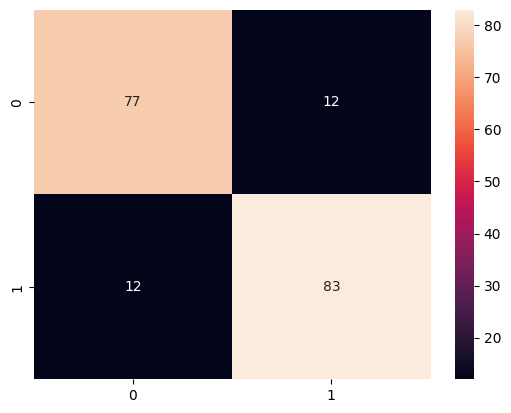

In [78]:
# Confusuion matrix for KNN


from sklearn.metrics import confusion_matrix


matrix= confusion_matrix(Y_test, y_pred_knn)


sns.heatmap(matrix,annot = True, fmt = "d")



In [79]:
# @title Precision
from sklearn.metrics import precision_score


precision = precision_score(Y_test, y_pred_knn)


print("Precision: ",precision)


Precision:  0.8736842105263158


In [80]:
# Recall


from sklearn.metrics import recall_score


recall = recall_score(Y_test, y_pred_knn)


print("Recall is: ",recall)



Recall is:  0.8736842105263158


In [81]:
# F-Score
print((2*precision*recall)/(precision+recall))

0.8736842105263158


In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Create a KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
# Perform k-fold cross-validation
scores = cross_val_score(classifier, X_standard, Y, cv=5)

# Print the cross-validated scores
print("Cross-validated scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean accuracy:", scores.mean()*100)
print("Standard deviation:", scores.std())
'''df = pd.DataFrame(X_standard)
df.shape'''

Cross-validated scores: [0.78804348 0.83152174 0.86956522 0.82513661 0.76502732]
Mean accuracy: 81.58588738417676
Standard deviation: 0.03625828447432281


'df = pd.DataFrame(X_standard)\ndf.shape'

In [83]:
'''#cross validation
knn_model = KNeighborsClassifier()
knn_result = cross_validation(knn_model, X_standard, Y, 5)
print(knn_result)'''

'#cross validation\nknn_model = KNeighborsClassifier()\nknn_result = cross_validation(knn_model, X_standard, Y, 5)\nprint(knn_result)'